In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,f1_score, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
df=pd.read_csv("7.csv")
mapping=dict(zip(df.species.unique(),(range(1,df.species.unique().size+1,1))))
df["species"]=df["species"].replace(mapping)

/tmp/ipykernel_93505/1788390792.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["species"]=df["species"].replace(mapping)


In [3]:
train,test_val=train_test_split(df,test_size=0.4,stratify=df["species"],random_state=42)
val,test=train_test_split(test_val,test_size=0.5,stratify=test_val["species"],random_state=42)

### KNN


In [4]:
scaler = StandardScaler()
x_train_KNN=train.drop(columns=["species"])
y_train_KNN=train["species"]
x_test_KNN=test.drop(columns=["species"])
y_test_KNN=test["species"]
x_val_KNN=val.drop(columns=["species"])
y_val_KNN=val["species"]
x_train_KNN=scaler.fit_transform(x_train_KNN)
x_test_KNN=scaler.transform(x_test_KNN)
x_val_KNN=scaler.transform(x_val_KNN)

In [5]:
#Testing various values of K on the validation data set to obtain the best value of K
val_accuracy=[]
nearest_neighbours=[1,3,5,7,9,11,13,15,17]
for i in nearest_neighbours:
    knn = KNeighborsClassifier(n_neighbors=i) 
    knn.fit(x_train_KNN,y_train_KNN)
    y_val_pred_KNN=knn.predict(x_val_KNN) 
    accuracy = accuracy_score(y_val_KNN, y_val_pred_KNN)
    val_accuracy.append(accuracy*100)

#running the model on test data for the best value of k as found earlier
best_n_neighbours=nearest_neighbours[val_accuracy.index(max(val_accuracy))]
print(f"The value of K, found out by expirimenting on validation data is: {best_n_neighbours}\n")
knn = KNeighborsClassifier(n_neighbors=best_n_neighbours) 
knn.fit(x_train_KNN,y_train_KNN)
y_test_pred_KNN=knn.predict(x_test_KNN) 
conf_matrix_SVM = confusion_matrix(y_test_KNN, y_test_pred_KNN)
accuracy_SVM = accuracy_score(y_test_KNN, y_test_pred_KNN)
precision_SVM = precision_score(y_test_KNN, y_test_pred_KNN, average='macro')
recall_SVM = recall_score(y_test_KNN, y_test_pred_KNN, average='macro')
f1_SVM=f1_score(y_test_KNN,y_test_pred_KNN,average='macro')
print("The results on test data for KNN with number of neighbors =",best_n_neighbours)
print("Confusion Matrix for KNN:\n", conf_matrix_SVM)
print("Accuracy(%) for KNN:", accuracy_SVM*100)
print("Precision(%) for KNN:", precision_SVM*100)
print("Recall(%) for KNN:", recall_SVM*100)
print("F1_score(%) for KNN:",f1_SVM*100)

print("\n\n\n\n\n")

The value of K, found out by expirimenting on validation data is: 11

The results on test data for KNN with number of neighbors = 11
Confusion Matrix for KNN:
 [[96  0  0  0  0  0  0  0  0]
 [ 0 83  0  0  0  0  0  0  0]
 [ 0  0 67  0  0  0  0 26  0]
 [ 0  0  0 87  0  0  0  0  0]
 [ 0  0  0  0 95  0  0  0  0]
 [ 0  0  0  0  0 92  0  0  0]
 [ 0  0  0  0  0  0 83  0  0]
 [ 0  0 24  0  0  0  0 72  0]
 [ 0  0  0  0  0  0  0  0 91]]
Accuracy(%) for KNN: 93.87254901960785
Precision(%) for KNN: 94.12175126460842
Recall(%) for KNN: 94.11589008363202
F1_score(%) for KNN: 94.11698789780368








### SVM

In [6]:
scaler = StandardScaler()
x_train_SVM=train.drop(columns=["species"])
y_train_SVM=train["species"]
x_test_SVM=test.drop(columns=["species"])
y_test_SVM=test["species"]
x_val_SVM=val.drop(columns=["species"])
y_val_SVM=val["species"]
x_train_SVM=scaler.fit_transform(x_train_SVM)
x_test_SVM=scaler.transform(x_test_SVM)
x_val_SVM=scaler.transform(x_val_SVM)

In [7]:
#Creating a grid of hyperparameters and running it on validation data to get the best values of the hyperparameters
gamma_range = np.linspace(1, 20, 20)
C_range = np.linspace(0.2, 2, 20)

Gamma, C = np.meshgrid(gamma_range, C_range)
Accuracy = np.zeros_like(Gamma)

for i in range(Gamma.shape[0]):
    for j in range(Gamma.shape[1]):
        svm_model = SVC(kernel="rbf", gamma=Gamma[i, j], C=C[i, j])
        svm_model.fit(x_train_SVM, y_train_SVM)
        preds_SVM = svm_model.predict(x_test_SVM)
        Accuracy[i, j] = accuracy_score(y_test_SVM, preds_SVM)

# Finding the  best hyperparameters
best_idx = np.unravel_index(np.argmax(Accuracy), Accuracy.shape)
best_gamma = Gamma[best_idx]
best_C = C[best_idx]
best_acc = Accuracy[best_idx]


#Running the SVM with the best found values of the hyperparameters
svm_model = SVC(kernel="rbf", gamma=best_gamma, C=best_C)
svm_model.fit(x_train_SVM, y_train_SVM)
y_test_pred_SVM = svm_model.predict(x_test_SVM)  
conf_matrix_SVM = confusion_matrix(y_test_SVM, y_test_pred_SVM)
accuracy_SVM = accuracy_score(y_test_SVM, y_test_pred_SVM)
precision_SVM = precision_score(y_test_SVM, y_test_pred_SVM, average='macro', zero_division=1)
recall_SVM = recall_score(y_test_SVM, y_test_pred_SVM, average='macro', zero_division=1)
f1_SVM=f1_score(y_test_SVM,y_test_pred_SVM,average='macro',zero_division=1)
print(f"The results on test data by SVM model with C={best_C:.2f} gamma={best_gamma} anf kernel=rbf")
print("Confusion Matrix: for SVM\n", conf_matrix_SVM)
print("Accuracy(%): for SVM", accuracy_SVM*100)
print("Precision(%): for SVM", precision_SVM*100)
print("Recall(%): for SVM", recall_SVM*100)
print("F1_score(%): for SVM",f1_SVM*100)
print("\n\n\n\n\n")

The results on test data by SVM model with C=0.86 gamma=13.0 anf kernel=rbf
Confusion Matrix: for SVM
 [[96  0  0  0  0  0  0  0  0]
 [ 0 83  0  0  0  0  0  0  0]
 [ 0  0 83  0  0  0  0 10  0]
 [ 0  0  0 87  0  0  0  0  0]
 [ 0  0  0  0 95  0  0  0  0]
 [ 0  0  0  0  0 92  0  0  0]
 [ 0  0  0  0  0  0 83  0  0]
 [ 0  0 28  0  0  0  0 68  0]
 [ 0  0  0  0  0  0  0  0 91]]
Accuracy(%): for SVM 95.34313725490196
Precision(%): for SVM 95.77269577269577
Recall(%): for SVM 95.56451612903226
F1_score(%): for SVM 95.50371872887085








RANDOM FOREST

Fitting 3 folds for each of 36 candidates, totalling 108 fits

 Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 100}

 Accuracy: 92.89%

Classification Report:
                        precision    recall  f1-score   support

    Anabas testudineus       1.00      1.00      1.00       160
     Coilia dussumieri       1.00      1.00      1.00       125
Otolithoides biauritus       0.66      0.79      0.72       141
     Otolithoides pama       1.00      1.00      1.00       129
     Pethia conchonius       1.00      1.00      1.00       132
  Polynemus paradiseus       1.00      1.00      1.00       159
  Puntius lateristriga       1.00      1.00      1.00       105
        Setipinna taty       0.75      0.61      0.67       146
 Sillaginopsis panijus       1.00      1.00      1.00       127

              accuracy                           0.93      1224
             macro avg       0.93      0.93      0.93      1224
          weig

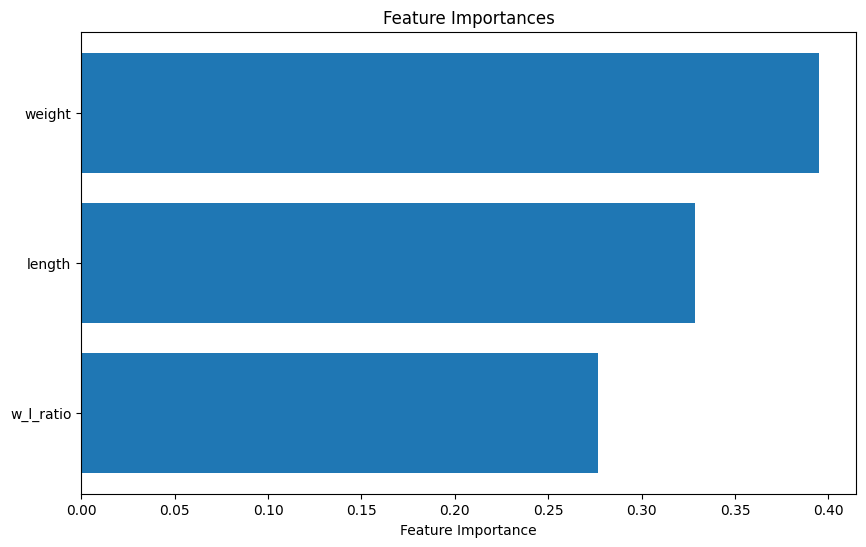

Cross-validation scores: [0.92401961 0.92156863 0.9375     0.9375     0.93504902]
Mean CV score: 93.11%


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

df = pd.read_csv('7.csv')

X = df.drop('species', axis=1)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['species'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5],
}

# Instantiate base model
rf = RandomForestClassifier(random_state=42)

# Grid Search
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Fit model
grid_search.fit(X_train, y_train)

# Best model prediction
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluation
print("\n Best Hyperparameters:", grid_search.best_params_)
print(f"\n Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

importances = best_rf.feature_importances_

# Sort and plot the importances
indices = importances.argsort()

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), X_train.columns[indices])
plt.xlabel("Feature Importance")
plt.show()

# Perform cross-validation
cv_scores = cross_val_score(RandomForestClassifier(n_estimators=100, random_state=42), X, y, cv=5)

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean() * 100:.2f}%")

LIGHTGBM

LightGBM Model Performance:
Accuracy: 0.9363
Precision: 0.9379
Recall: 0.9363
F1 Score: 0.9370

Classification Report:
                         precision    recall  f1-score   support

    Anabas testudineus       1.00      1.00      1.00        95
     Coilia dussumieri       1.00      1.00      1.00        83
Otolithoides biauritus       0.74      0.78      0.76        94
     Otolithoides pama       1.00      0.99      0.99        87
     Pethia conchonius       1.00      1.00      1.00        95
  Polynemus paradiseus       1.00      1.00      1.00        91
  Puntius lateristriga       1.00      0.95      0.98        84
        Setipinna taty       0.73      0.73      0.73        96
 Sillaginopsis panijus       1.00      1.00      1.00        91

              accuracy                           0.94       816
             macro avg       0.94      0.94      0.94       816
          weighted avg       0.94      0.94      0.94       816



<Figure size 1000x600 with 0 Axes>

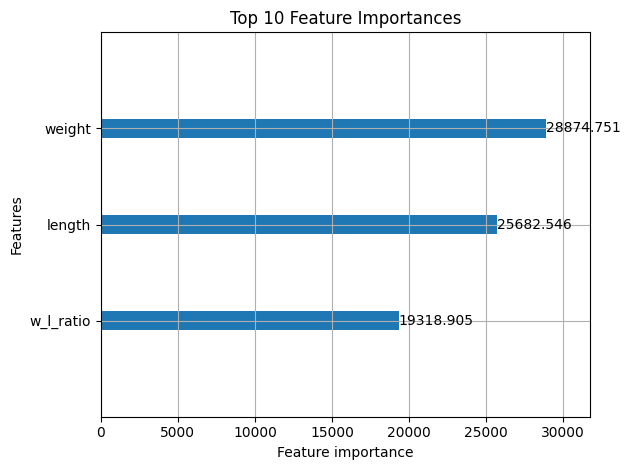

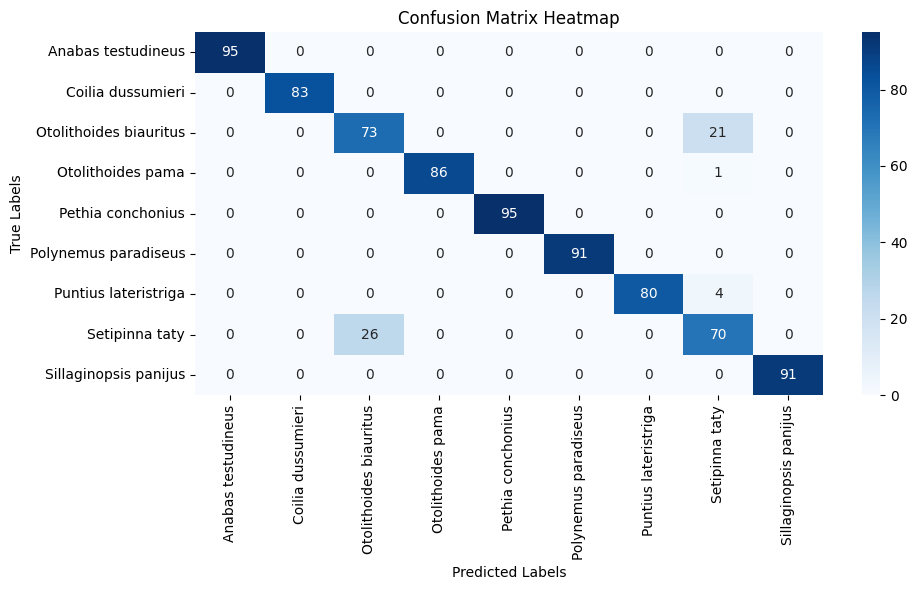

In [3]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('7.csv')

X = data.drop("species", axis=1)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data["species"])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define the LightGBM model
lgb_model = lgb.LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    objective='multiclass',
    num_class=len(np.unique(y)),
    random_state=42,
    verbosity=-1
)

# Train the model
lgb_model.fit(X_train, y_train)

# Predict
lgb_preds = lgb_model.predict(X_test)

# Evaluation
print("LightGBM Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, lgb_preds):.4f}")
print(f"Precision: {precision_score(y_test, lgb_preds, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, lgb_preds, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, lgb_preds, average='weighted'):.4f}")
print("\nClassification Report:\n", classification_report(y_test, lgb_preds, target_names=label_encoder.classes_))

#Feature importance plot
plt.figure(figsize=(10, 6))
lgb.plot_importance(lgb_model, max_num_features=10, importance_type='gain')
plt.title("Top 10 Feature Importances")
plt.tight_layout()
plt.show()

cm = confusion_matrix(y_test, lgb_preds)

# Plot confusion matrix heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.tight_layout()
plt.show()